In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [254]:
dataset = pd.read_excel(r"C:\Users\KHAOULA\Desktop\PFSGI3\dataset.xlsx")  
print(dataset)

           Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                              

In [255]:
dataset.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# PRE-PROCESSING

In [256]:
dataset.copy()
dataset.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [257]:
dataset.shape

(5644, 111)

# Création des sous-ensembles

In [258]:
missing_rate = dataset.isna().sum()/dataset.shape[0]

In [259]:
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [260]:
blood_columns = list(dataset.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])

In [261]:
viral_columns = list(dataset.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [262]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

utiliser les trois val pour filtrer notre dataset

In [263]:
dataset = dataset[key_columns + blood_columns + viral_columns]
dataset.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


### TrainTest Nettoyage Encodage

In [264]:
from sklearn.model_selection import train_test_split

train test split permet de decouper notre dataset en trainset et testset


In [265]:
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=0)

pour etre sur qu''on a deux proportion

In [266]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [267]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

maintenant on aura passé au nettoyage

nous avons 4 variables qualitatives de type objet : pos , neg , detected , not detected
donc ce codage permet de cree un dictionnaire relie ces variables avec des nombres

la fonction map permet d'appliquer ce dictionnaire a tous les valeurs de types objet de chaque colonne

In [268]:
def encodage(dataset):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in dataset.select_dtypes('object').columns:
        dataset.loc[:,col] = dataset[col].map(code)
        
    return dataset

def feature_engineering(dataset):
    dataset['est malade'] = dataset[viral_columns].sum(axis=1) >= 1
    dataset = dataset.drop(viral_columns, axis=1)
    return dataset

In [303]:
def feature_engineering(dataset):
    dataset['est malade'] = dataset[viral_columns].sum(axis=1) >= 1
    dataset = dataset.drop(viral_columns, axis=1)
    return dataset

est malade ca veut pas dire au corona , mais juste teste positive a une maladie
>=1 il suffit que la personne ait au moins une maladie

### fonction pour eliminer notre variable manquante
passer notre dataset soit trainset ou testset

In [304]:
def imputation(dataset):
    dataset = dataset.dropna(axis=0)
    return  dataset

toute les variables qualitat sont remplacer par 0-1

dans cette fonction on va faire l'encodage et l'imputation et pour finir cette fonction on cree le x et le y pour faire le preprocessing dont on a besoin

In [305]:
def preprocessing(dataset):
    
    dataset = encodage(dataset)
    dataset = feature_engineering(dataset)
    dataset = imputation(dataset)
    
    X = dataset.drop('SARS-Cov-2 exam result', axis=1)
    y = dataset['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [306]:
X_train, y_train = preprocessing(trainset)

<ipython-input-303-79b49c816090>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['est malade'] = dataset[viral_columns].sum(axis=1) >= 1


0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


In [307]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-303-79b49c816090>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['est malade'] = dataset[viral_columns].sum(axis=1) >= 1


ensuite nous avons essayer de creer un modele par exemple arbre de decision pour diagnosti le modele : quel sont les variables important .....

### modellisation


importer l'estimateur DecisionTreeClassifier

In [386]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures


creer un modele arbre de decision avec un generateur aleatoir fixer a 0 ; pour avoir une reputabilité dans les resultats at ainsi evaluer les diff decision qu'on va prendre 

In [387]:
model = DecisionTreeClassifier(random_state=0)


In [371]:
model_1 = RandomForestClassifier(random_state=0)


In [372]:
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                     ## RandomForestClassifier(random_state=0))

prendre les 10 meilleurs variables celles qui ont les liens les plus fort en test de anova entre notre target et nos variables x_train
polynomialefeatures permet d'augmenter chaque variable au carre et de multiplier egalement chaque variable avec ses diff voisines
ensuite pour filtrer tous ca on garde les 10 meil var

In [388]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
datasetVoteBis = pd.get_dummies(dataset[dataset.columns[:-1]])
plt.figure(figsize=(20,7.5))
plot_tree(model,feature_names = list(datasetVoteBis.columns[:-1]),filled=True)
plt.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 1440x540 with 0 Axes>

donc c'est le temps de cree une procedure d'evaluation qui soit robuste, claire et informative

# Procédure d'evaluation 

In [373]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

pour avoir le bon apercu entre le rapport de la precision et de la sensibilitée 

la précision et la sensib permet de mesurer la proportion d'erreur de type 1 et 2 dans notre dataset c-a-d les proportions de faux positives et de faux negatives que notre modele effectue

confusion matrix : pour voir les rapports entre fx pos et fx neg

classif repo : un super outils qui va nous faire un bilan

learning curve va nous aidee pour prendre des decisions ( creer des polynomes )


In [374]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[92  3]
 [13  3]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        95
           1       0.50      0.19      0.27        16

    accuracy                           0.86       111
   macro avg       0.69      0.58      0.60       111
weighted avg       0.82      0.86      0.83       111



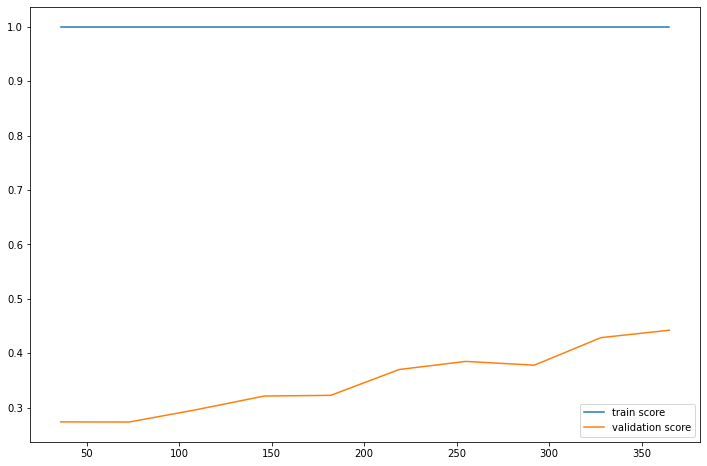

In [375]:
evaluation(model_1)

alors dans cette evaluation on observe que y a pas d'erreur et on a : 
54 cas negatifs dans notre dataset on a pu identifier correctement 52 personnes et on a fait 2 erreur ( peut etre contaminer)
méme pour les y=1 : 2 cas positif et 10 cas incorrectement rejeter
on a pu identifier seulement 17% des cas positifs au corona avec ce modele de machine learning

le score f1 est un tres bon rapport entre la precision et le recall et ca ne permettre si notre modele arrive a la fois a bien identifier les cas positifs et bien identifier les cas negatifs 

et puis en vas ajouter dans cette fonction d'evaluation des learning curve pour comprendre si notre modele est under ou over-fitting
under-fitting pour les ajouter il faut identifier 3 variables qui utilise la validation croiser pour entrainer et evaluer notre modele sur plusieurs split de notre dataset

alors une fois en arrive a bien identifier les diffs scores de avec learning curve ==> visualiser les resultats dans un graphique 

# le diagnostique de notre modéle

on voit que notre modélé est en overfitting parceque le modéle a un score de 100% sur les données du trainset donc il a parfaitement (ok sur le trainset) 
par contre il est incappable de generaliser sur de nouveau cas (des performances f1(le score f1 qui est pbserver ici) beaucoup moins bonne )
au mieux on obtient 50% qui est déja trop bon
a partir de la on peut donc essayer de modifier notre dataset pour lutter cette over-fitting 
par exemple fournir plus de donnée a la machine 
plus on a des données plus le score de validation augmente

et pour améliorer on adopte la selection de variable 
selectioner les variables les plus importantes dans la decoupe de l'arbre de décision

In [376]:
pd.DataFrame(model_1.feature_importances_, index=X_train.columns)


,0
Patient age quantile,0.044181
Hematocrit,0.049772
Hemoglobin,0.039850
Platelets,0.112081
Mean platelet volume,0.040389
Red blood Cells,0.049993
Lymphocytes,0.051813
Mean corpuscular hemoglobin concentration (MCHC),0.044944
Leukocytes,0.210472
Basophils,0.027783


<AxesSubplot:>

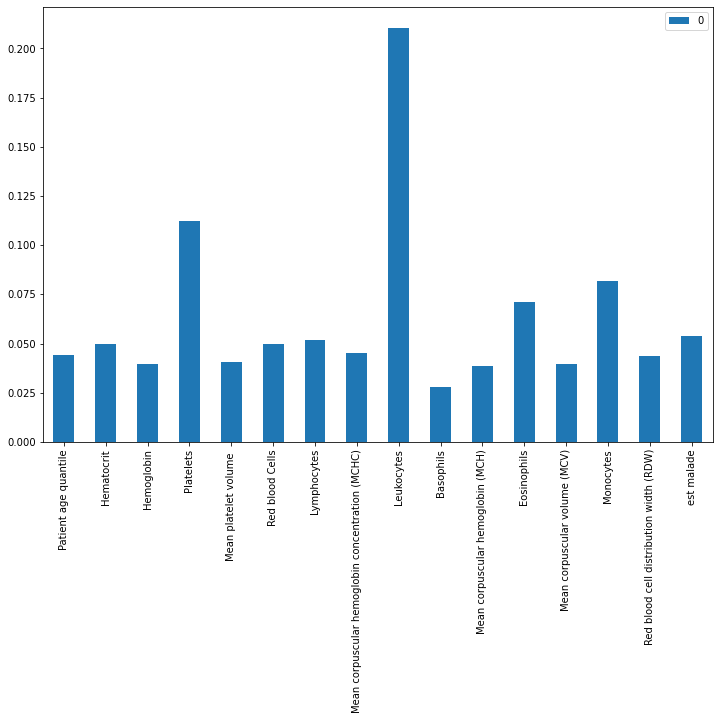

In [382]:
pd.DataFrame(model_1.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

on se retrouve avec un graphique qui nous montre ou sont les variables les plus importantes pour notre arbre de decision 
les variables de type sang sont plus importants que de type virus
donc a partir de ce graphique on va faire deux choses : 
*definir un seuil en dessous duquel les variables ne sont pas selectionnés.par exemple 0.01 et toutes les variables qui sont en dessous de ce seuil partent a la poubelles 
*rendre compte que la majourité des variables qui n'ont aucune importance sont les variables viral , donc pourquoi pas supp ces données 
plus de données = augmentation du potentielle de validation score 

# Eliminer les variables de type viral

on n'a pas reussi

utiliser un modéle régularisés ou un modéle qui lutte contre l'over fitting : la random forest 
donc au lieu d'utiliser un arbre de décision 

apres feature eng on observe qu'il y a encore des variables qui sont pas importantes
donc on peurrait tenter de definir un seuil avec le selecteur : select from model ou select key best 

# conclusion : 
    les modéles baser sur des arbres ne necessite pas de faire de normalisation
    un peu d'encodage 
    un peu de feature engineering 
    une imputation 
    nous avons identifiés les variables les plus importants 
    nous avons pre-traiter ce dataset dans le but de dev un modele de machine learning 
    avec tous ca nous avons dev un modele de machine learning on l'essayons de l'optimis pour avoir les meilleurs performance possible 
    

# MODÈLE DE MACHINE LEARNING

 les differents modele de machine learning : 
       Decision Tree, Random Forest, Neural Network
       RandomForestClassifier, AdaBoostClassifier , Support Vecteur machine , KNeighborsClassifier
